In [2]:
import numpy as np
import pandas as pd

from statistics import stdev
import scipy
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
sns.set_context("notebook")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [3]:
pd.options.display.max_columns = None

In [4]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [5]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
# Understanding column types
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
# check for null values
data.isnull().sum()
# No null values in the data

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Exploratory Data Analysis

In [8]:
cat_cols=data.select_dtypes(include=object).columns.tolist()
cat_df=pd.DataFrame(data[cat_cols].melt(var_name='column', value_name='value')
                    .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])
display(data.select_dtypes(include=object).describe())
display(cat_df)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


count
column         value                           
Attrition      Yes                          237
               No                          1233
BusinessTravel Non-Travel                   150
               Travel_Frequently            277
               Travel_Rarely               1043
Department     Human Resources               63
               Sales                        446
               Research & Development       961
EducationField Human Resources               27
               Other                         82
               Technical Degree             132
               Marketing                    159
               Medical                      464
               Life Sciences                606
Gender         Female                       588
               Male                         882
JobRole        Human Resources               52
               Research Director             80
               Sales Representative          83
               Manager                      102
               Healthcare Representative    131
               Manufacturing Director       145
               Laboratory Technician        259
               Research Scientist           292
               Sales Executive              326
MaritalStatus  Divorced                     327
               Single                       470
               Married                      673
Over18         Y                           1470
OverTime       Yes                          416
               No                          1054

<AxesSubplot:>

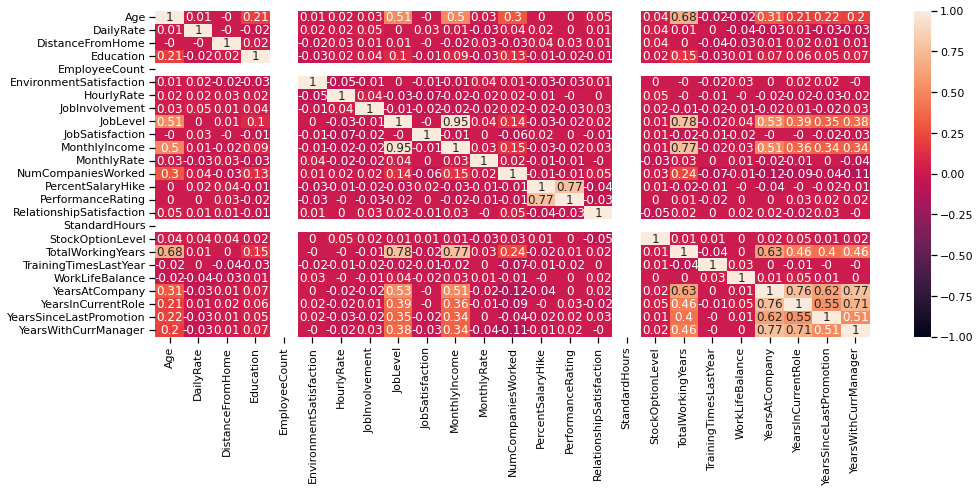

In [9]:
cat_cols=[]
for i in data.columns:
    if data[i].dtype == object:
        cat_cols.append(i)
df=data.copy()
df.drop(df[cat_cols], axis=1, inplace=True)
df.drop('EmployeeNumber', axis=1, inplace=True)
corr=df.corr().round(2)

plt.figure(figsize=(16, 6))
sns.heatmap(corr,vmin=-1, vmax=1,annot=True)
# The correlation values are below 0.8 for all variables

In [10]:
# Checking for variables with 0 variance
norm_df=data.copy()
nzv=[]
for i in norm_df[cat_cols]:
    norm_df[i]=pd.factorize(norm_df[i])[0]
for i in norm_df.columns:
    if stdev(norm_df[i]) == 0.0:
        nzv.append(i)

# Converting cols to category
for i in data[cat_cols]:
    if i=='Attrition':
        continue
    data[i] = pd.Categorical(data[i])

# Removing variables with 0 variance and Employee Number
print("Dropping variables with zero variance:", nzv)
data.drop(data[nzv], axis=1, inplace=True)
data.drop('EmployeeNumber', axis=1, inplace=True)
df=data.copy()
df.shape

Dropping variables with zero variance: ['EmployeeCount', 'Over18', 'StandardHours']


(1470, 31)

In [11]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [14]:
df.dtypes

Age                            int64
Attrition                     object
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EnvironmentSatisfaction        int64
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StockOptionLevel               int64
TotalWorkingYears              int64
TrainingTimesLastYear          int64
WorkLifeBalance                int64
Y

### To determine if there is a relationship between Attrition and the other categorical variables in the data set, I will use the chi-square test of independence. The null hypothesis for this test is that the variables are independent, there is no association between Attrition and the variable being tested, while the alternative hypothesis is that that there is a relationship.

In [13]:
cat_cols=df.select_dtypes(include="category").columns.tolist() 
chi_statistic=[]
p_val=[]
vars_rm=[]

for i in df[cat_cols]:
    observed=pd.crosstab(index=df["Attrition"], columns=df[i])
    stat, p, dof, expected=chi2_contingency(observed)
    chi_statistic.append(stat)
    p_val.append(p)
    if p >= 0.05:
        print("Attrition and {} are independent (p-value = {:.2f}).\n".format(i,p))
        vars_rm.append(i)

chi_df = pd.DataFrame()
chi_df["Variable"] = cat_cols
chi_df["Chi_Statistic"] = chi_statistic
chi_df["P_value"] = p_val
chi_df=chi_df[chi_df.P_value<0.05].sort_values("P_value", ascending=True)
display(chi_df)

Attrition and Gender are independent (p-value = 0.29).



,Variable,Chi_Statistic,P_value
6,OverTime,87.564294,8.158424e-21
4,JobRole,86.190254,2.752482e-15
5,MaritalStatus,46.163677,9.455511e-11
0,BusinessTravel,24.182414,5.608614e-06
1,Department,10.796007,4.525607e-03
2,EducationField,16.024674,6.773980e-03


In [15]:
# Variables to remove after independence test
vars_rm

['Gender']

In [21]:
chi_df.Variable.values

array(['OverTime', 'JobRole', 'MaritalStatus', 'BusinessTravel',
       'Department', 'EducationField'], dtype=object)

In [16]:
# Encoding categorical variables
y=df['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)
X=df.loc[:, df.columns != 'Attrition']
X.drop(X[vars_rm], axis=1, inplace=True)
X=pd.get_dummies(X, columns=chi_df.Variable.values, drop_first=True)
X.columns=X.columns.str.replace(' ', '')
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime_Yes,JobRole_HumanResources,JobRole_LaboratoryTechnician,JobRole_Manager,JobRole_ManufacturingDirector,JobRole_ResearchDirector,JobRole_ResearchScientist,JobRole_SalesExecutive,JobRole_SalesRepresentative,MaritalStatus_Married,MaritalStatus_Single,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research&Development,Department_Sales,EducationField_LifeSciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_TechnicalDegree
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0


In [20]:
X.shape

(1470, 43)

# Prepping data for Logistic Regression

In [15]:
# Create Train Test sets
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.7, random_state=21)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=21)

print("Train Shape:", X_train.shape, y_train.shape)
print("Validation set Shape:", X_val.shape,y_val.shape)
print("Test set Shape:", X_test.shape, y_test.shape)

Train Shape: (1029, 53) (1029,)
Validation set Shape: (220, 53) (220,)
Test set Shape: (221, 53) (221,)


In [16]:
# Scale the data
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime_Yes,JobRole_HumanResources,JobRole_LaboratoryTechnician,JobRole_Manager,JobRole_ManufacturingDirector,JobRole_ResearchDirector,JobRole_ResearchScientist,JobRole_SalesExecutive,JobRole_SalesRepresentative,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,MaritalStatus_Married,MaritalStatus_Single,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,Department_Research&Development,Department_Sales,EducationField_LifeSciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_TechnicalDegree
0,0.039281,-1.431033,-0.382060,1.548533,-0.005600,1.223427,0.526182,-0.310835,-0.523106,1.731250,-0.301401,-0.026246,-0.673777,-0.836499,-0.629445,-0.184854,-0.452679,-0.276333,-0.32261,-0.253211,-0.51091,1.874342,-0.253211,1.331760,-0.406627,-0.272237,-0.235339,1.196923,-0.344207,-0.253211,1.079961,-0.674867,-0.58745,0.855759,-0.344207,-0.478947,0.639991,-0.491177,1.495276,-0.670295,-0.482012,-0.643010,1.471786,-0.542531,-1.261721,2.950855,-1.374936,1.515941,-0.822129,-0.349482,1.448930,-0.23763,-0.322610
1,-1.056109,1.632008,-1.000009,0.767530,-0.566258,0.525874,-0.678807,-1.130259,-0.783583,-0.607642,-0.301401,-0.583097,-0.673777,0.004084,-0.629445,-0.184854,2.209072,-0.276333,-0.32261,-0.253211,-0.51091,-0.533521,-0.253211,-0.750886,-0.406627,-0.272237,-0.235339,1.196923,-0.344207,-0.253211,-0.925959,-0.674867,-0.58745,0.855759,-0.344207,-0.478947,0.639991,-0.491177,-0.668773,1.491880,2.074638,-0.643010,-0.679447,-0.542531,0.792568,-0.338885,0.727306,-0.659656,-0.822129,-0.349482,1.448930,-0.23763,-0.322610
2,0.039281,1.493788,-0.505649,0.865156,-0.632218,1.596613,-1.080469,-0.310835,-0.523106,-0.607642,-0.139023,0.252179,-0.353538,-0.276110,-0.629445,-0.184854,2.209072,-0.276333,-0.32261,-0.253211,-0.51091,-0.533521,-0.253211,-0.750886,-0.406627,-0.272237,-0.235339,-0.835476,-0.344207,-0.253211,-0.925959,1.481773,-0.58745,-1.168553,2.905231,-0.478947,-1.562521,-0.491177,1.495276,-0.670295,-0.482012,1.555186,-0.679447,-0.542531,-1.261721,-0.338885,0.727306,-0.659656,-0.822129,-0.349482,-0.690165,-0.23763,3.099717
3,-0.179797,1.449361,-0.011290,-0.892100,-0.298662,0.641145,-0.678807,1.054873,-0.132390,1.731250,0.510488,0.809031,-0.673777,1.124863,-0.629445,-0.184854,-0.452679,-0.276333,-0.32261,-0.253211,1.95729,-0.533521,-0.253211,1.331760,-0.406627,-0.272237,-0.235339,-0.835476,-0.344207,-0.253211,-0.925959,1.481773,-0.58745,0.855759,-0.344207,-0.478947,0.639991,2.035927,-0.668773,-0.670295,-0.482012,1.555186,-0.679447,-0.542531,0.792568,-0.338885,0.727306,-0.659656,-0.822129,-0.349482,1.448930,-0.23763,-0.322610
4,2.339599,-0.500520,1.471788,0.279404,2.368326,-0.337603,0.526182,-0.583976,2.342142,-0.607642,-0.950912,-1.139948,-0.673777,-1.116694,1.588702,-0.184854,-0.452679,3.618824,-0.32261,-0.253211,-0.51091,-0.533521,-0.253211,-0.750886,-0.406627,3.673276,-0.235339,1.196923,-0.344207,-0.253211,1.079961,-0.674867,-0.58745,0.855759,-0.344207,-0.478947,0.639991,-0.491177,-0.668773,1.491880,-0.482012,-0.643010,1.471786,1.843213,-1.261721,-0.338885,-1.374936,1.515941,1.216354,-0.349482,-0.690165,-0.23763,-0.322610


In [17]:
y_train

273     0
373     0
1022    0
1424    0
1374    0
       ..
368     1
48      0
772     0
1231    0
969     0
Name: Attrition, Length: 1029, dtype: int64

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [19]:
# Apply Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train, y_train)
evaluate(lr_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[850  16]
 [ 78  85]]
ACCURACY SCORE:
0.9086
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.915948    0.841584  0.908649     0.878766      0.904169
recall       0.981524    0.521472  0.908649     0.751498      0.908649
f1-score     0.947603    0.643939  0.908649     0.795771      0.899501
support    866.000000  163.000000  0.908649  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[174  11]
 [ 18  18]]
ACCURACY SCORE:
0.8688
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.906250   0.620690  0.868778    0.763470      0.859733
recall       0.940541   0.500000  0.868778    0.720270      0.868778
f1-score     0.923077   0.553846  0.868778    0.738462      0.862931
support    185.000000  36.000000  0.868778  221.000000    221.000000


In [21]:
! pip install mlxtend

     |████████████████████████████████| 1.4 MB 8.3 MB/s eta 0:00:01
     |████████████████████████████████| 10.2 MB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 22.9 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [22]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
 

In [45]:
df.dtypes

Age                            int64
Attrition                      int64
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EnvironmentSatisfaction        int64
Gender                         int64
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StockOptionLevel               int64
TotalWorkingYears              int64
TrainingTimesLastYear          int64
WorkLifeBalance                int64
Y

In [44]:
df['Attrition']=df['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)
df['Gender']=df['Attrition'].apply(lambda x: 1 if x=='Male' else 0)

In [46]:
df.select_dtypes(include="category").columns.tolist()

['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [47]:
y=df['JobSatisfaction']
X=df.loc[:, df.columns != 'JobSatisfaction']
X.drop(['Attrition'], axis=1, inplace=True)
X=pd.get_dummies(X, columns=X.select_dtypes(include="category").columns.tolist(), drop_first=True)
X.columns=X.columns.str.replace(' ', '')
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research&Development,Department_Sales,EducationField_LifeSciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_TechnicalDegree,JobRole_HumanResources,JobRole_LaboratoryTechnician,JobRole_Manager,JobRole_ManufacturingDirector,JobRole_ResearchDirector,JobRole_ResearchScientist,JobRole_SalesExecutive,JobRole_SalesRepresentative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,0,94,3,2,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,0,61,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,0,92,2,1,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,0,56,3,1,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,0,40,3,1,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=21)

In [52]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [56]:
y_pred=linreg.predict(X_test)

In [57]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

NameError: name 'r2_score' is not defined

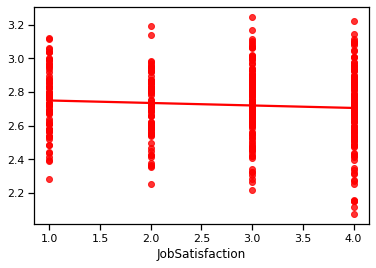

In [58]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [73]:
sns.__version__

'0.11.2'

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

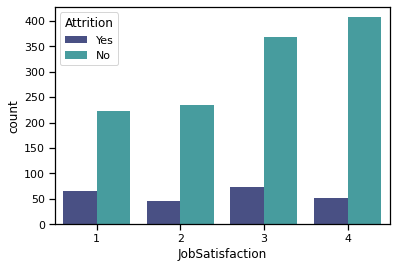

In [74]:
sns.countplot(data = data, x='JobSatisfaction', hue='Attrition', palette='mako')

In [75]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

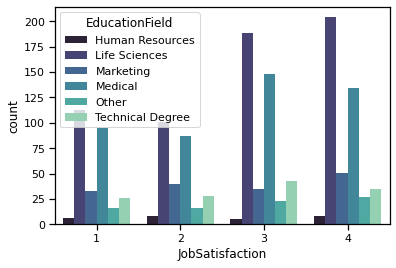

In [79]:
sns.countplot(data = data, x='JobSatisfaction', hue='EducationField', palette='mako')